In [1]:
import numpy as np
import matplotlib.pyplot as plt
from possibilearn import *
from possibilearn.kernel import GaussianKernel
from support_vector_fuzzifier import *
import skfuzzy as fuzz

source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

iris_df = pd.read_csv(
    filepath_or_buffer=source,
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_values = iris_df.iloc[:,:4].values #array dei soli valori
iris_labels = iris_df.iloc[:,4].values #array delle etichette

iris_2d = get_principal_components(iris_values, 2)
iris_3d = get_principal_components(iris_values, 3)
iris_4d = get_principal_components(iris_values, 4)

In [2]:
ncenters = 3 #numero di clusters

x = iris_2d[:,0]
y = iris_2d[:,1]
p = np.vstack((x, y))

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        p, ncenters, 2, error=0.005, maxiter=1000, init=None)

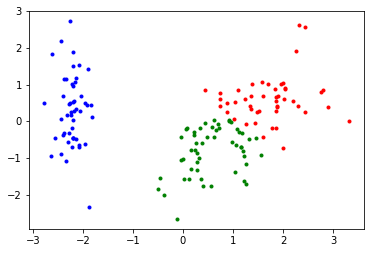

In [3]:
colors = ['r', 'g', 'b']

cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    plt.plot(x[cluster_membership == j],
            y[cluster_membership == j], '.', color=colors[j])

In [4]:
labelled_clusters = [l.mode()[0] for l in [pd.Series(ls) for ls in 
                       [[b for (a,b) in zip(cluster_membership, iris_labels) if a == i] for i in range(3)]]]

labelled_clusters

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

In [5]:
float(len(iris_values[[labelled_clusters[i] for i in cluster_membership] == iris_labels])) / float(len(iris_values))

0.8333333333333334

In [6]:
import support_vector_fuzzifier as svf
sigmas = np.array([0.288, 0.250, 0.222])
cs = np.array([10**i for i in range(-2,3)])

In [7]:
result2d = svf.iterate_tests_vs_fuzzycmeans(iris_values, iris_labels, cs, sigmas, 10, dim=2, 
                                 force_num_fs=True, force_labels_repr=True)



holdout iteration 0

model selection: trying parameters c=0.01, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[58, 11, 69, 62]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 16, 17, 18, 19, 21, 23, 25, 26, 29, 30, 34, 35, 36, 37, 38, 40, 42, 43, 45, 53, 57, 58, 60, 62, 65, 66, 67, 69, 70, 72, 75, 76, 77, 78, 79, 80, 81, 82, 89, 90, 96, 100, 103, 104, 106, 108, 110, 112, 113, 115, 118], [64, 33, 27, 101, 74, 46, 99, 114, 51, 20, 24, 116, 91, 92, 63], [98, 

inferring membership functions
first clusters [[0, 1, 12, 18, 21, 31, 34, 44, 45, 51, 53, 54, 59, 61, 65, 68, 82, 85, 87, 88, 90, 103, 108, 109, 110, 116], [7, 9, 10, 23, 25, 38, 49, 50, 52, 55, 56, 57, 60, 77, 78, 81, 89, 91, 93, 104, 105, 117, 118], [32, 97, 98, 3, 96, 101, 70, 39, 72, 112, 14, 111, 48, 17, 28, 22, 41, 79, 92, 62], [64, 4, 5, 8, 73, 74, 76, 80, 113, 83, 119, 36, 58, 37], [99, 106, 43, 13, 11, 94, 30, 63], [2, 100, 47], [84, 102, 86]]
associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.733333333333

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[0, 1, 12, 18, 21, 31, 34, 44, 45, 51, 53, 54, 59, 61, 65, 68, 82, 85, 87, 88, 90, 103, 108, 109, 110, 116], [7, 9, 10, 23, 25, 38, 49, 50, 52, 55, 56, 57, 60, 77, 78, 81, 89, 91, 93, 104, 105, 117, 118], [32, 97, 98, 3, 96, 101, 70, 39, 72, 112, 14, 111, 48, 17, 28, 22, 41, 79, 92, 62], [64, 4, 5, 8, 73, 74, 76, 80, 

inferring membership functions
first clusters [[3, 16, 20, 21, 23, 34, 36, 41, 49, 50, 52, 54, 55, 56, 57, 61, 64, 70, 80, 86, 90, 94, 95, 97, 102, 103, 115], [28, 5, 38, 81, 40, 92, 10, 75, 44, 77, 46, 17, 82, 113, 84, 85, 104, 59, 60], [96, 65, 67, 68, 101, 71, 93, 79, 18, 19, 22, 87, 25, 29, 37], [66, 100, 69, 74, 43, 109, 13, 110, 45, 83, 117, 62], [2, 35, 7, 112, 114, 26, 63], [33, 73, 42, 11, 118, 119, 27], [1, 106, 51, 89]]
associated labels ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
accuracy:  0.866666666667

model selection: trying parameters c=100.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[64, 97, 34, 3, 36, 102, 103, 41, 57, 55, 80, 52, 21, 86, 23, 20, 90, 61, 94, 95], [28, 5, 38, 81, 40, 92, 10, 75, 44, 77, 46, 17, 82, 113, 84, 85, 104, 59, 60], [96, 65, 98, 67, 68, 37, 6, 71, 47, 76, 93, 18, 19, 22, 87, 25, 79, 29, 101], [66, 100, 69, 74, 43, 109, 13, 110, 45, 83, 117, 62], [2, 35, 7, 112, 114, 26, 63], [33, 73, 42, 11,

training accuracy:  0.681481481481
starting model against cmeans
training accuracy with fuzzy cmeans:  0.851851851852
test accuracy with fuzzy cmeans:  0.8
iteration is valid


holdout iteration 4

model selection: trying parameters c=0.01, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 3, 6, 7, 13, 15, 17, 18, 19, 20, 21, 22, 24, 28, 29, 31, 34, 35, 36, 37, 39, 40, 41, 42, 44, 49, 50, 52, 58, 59, 60, 63, 64, 66, 71, 72, 75, 77, 78, 80, 84, 85, 88, 92, 94, 95, 96, 98, 99, 100, 102, 103, 104, 105, 106, 109, 113, 116, 118, 119], [0, 2, 4, 5, 10, 11, 14, 16, 26, 27, 43, 46, 47, 54, 55, 61, 67, 70, 87, 90, 91, 110, 112, 115, 117], [32, 33, 83, 69, 9, 23, 108, 76, 51, 86, 73, 56, 25, 93, 62]]
Some of the labels dont represent a cluster

model selection: trying parameters c=1.0, sigma=0.288
starting clusteri

associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.866666666667

model selection: trying parameters c=10.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 2, 3, 7, 16, 17, 26, 27, 34, 37, 38, 40, 41, 43, 45, 46, 49, 51, 53, 54, 55, 62, 68, 69, 70, 71, 73, 77, 82, 85, 87, 91, 92, 94, 95, 103, 104, 106, 108, 111, 114, 115], [5, 10, 15, 24, 29, 32, 33, 39, 42, 44, 52, 67, 74, 78, 81, 83, 84, 86, 93, 97, 99, 100, 102, 116, 117], [0, 4, 8, 9, 11, 12, 13, 14, 18, 47, 50, 64, 65, 75, 89, 90, 96, 98, 101, 105, 107, 119], [72, 76, 110, 20, 21, 25], [113, 36, 61, 109]]
associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.866666666667

model selection: trying parameters c=100.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 2, 3, 7, 16, 17, 26, 27, 34, 37, 38, 40, 41, 43, 45, 46, 49, 51, 53, 54, 55, 62, 68, 69, 70, 71, 73, 77, 82, 85, 87, 91, 92, 94, 95,

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.25
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[1, 10, 11, 18, 22, 25, 26, 29, 30, 31, 32, 33, 39, 40, 48, 51, 52, 55, 56, 59, 66, 76, 80, 82, 83, 84, 86, 89, 92, 95, 99, 105, 106, 107, 109, 111, 113, 118], [2, 4, 7, 8, 12, 14, 16, 17, 20, 23, 27, 34, 35, 36, 42, 45, 50, 53, 57, 63, 71, 85, 88, 91, 94, 104, 108, 112, 114, 116], [65, 68, 6, 70, 41, 110, 79, 21, 100, 58, 38, 90], [96, 97, 72, 73, 77, 78, 49, 19, 117, 54, 24, 60], [98, 101, 102, 103, 9, 13, 37]]
associated labels ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
accuracy:  0.466666666667

model selection: trying parameters c=10.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[68, 5, 70, 71, 45, 1

associated labels ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
accuracy:  0.866666666667

model selection: trying parameters c=10.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[0, 4, 5, 8, 12, 15, 26, 36, 38, 41, 42, 44, 46, 48, 59, 67, 68, 69, 78, 89, 95, 107, 112, 116], [33, 66, 65, 105, 79, 43, 29, 14, 111, 16, 19, 52, 53, 86, 24, 57, 71, 103, 92, 90], [32, 2, 102, 81, 106, 45, 17, 82, 84, 117, 88, 20, 91, 31], [96, 3, 9, 109, 47, 99, 22, 23, 63], [6, 7, 74, 118, 87, 27, 93], [76, 49, 18, 83, 108], [56, 25, 98, 60], [75, 37, 30]]
associated labels ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
accuracy:  0.866666666667

model selection: trying parameters c=100.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[0, 4, 5, 8, 12, 15, 26, 36, 38, 41, 42, 44, 46, 48, 59, 67, 68, 69, 78, 89, 95, 107, 112, 116], [33, 66, 65, 105, 79, 43, 29, 14, 111, 16, 19, 52, 53, 86, 24, 57, 71, 103, 92, 90], [32, 2

first clusters [[3, 7, 10, 20, 23, 30, 32, 35, 45, 51, 52, 57, 59, 61, 65, 66, 72, 73, 80, 85, 89, 91, 93, 96, 98, 100, 102, 106, 109, 111, 118], [0, 9, 12, 13, 14, 17, 22, 28, 29, 33, 36, 37, 38, 40, 56, 68, 74, 78, 83, 88, 97, 104, 105, 110, 113], [2, 67, 69, 42, 75, 34, 117, 86, 90, 101], [71, 8, 41, 39, 108, 15, 48, 60, 31], [70, 119, 77, 46, 112, 55, 92, 94, 63], [115, 84, 6], [50, 19, 47], [76, 62, 79]]
associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.933333333333

best couple (10.0, 0.222)
inferring membership functions
first clusters [[129, 130, 3, 6, 7, 10, 20, 23, 30, 32, 35, 45, 52, 57, 59, 61, 66, 72, 73, 80, 84, 85, 91, 93, 96, 98, 100, 102, 106, 109, 111, 115, 118, 120, 121, 123, 126, 127], [0, 128, 131, 132, 133, 134, 9, 12, 14, 16, 17, 22, 28, 29, 33, 36, 38, 40, 56, 68, 74, 78, 83, 105, 110, 113], [112, 99, 4, 70, 71, 8, 41, 39, 108, 77, 46, 15, 48, 49, 63, 92, 55, 119, 60, 94, 31], [2, 75, 101, 42, 43, 34, 125, 67, 117, 86, 25, 90, 5

### result3d = svf.iterate_tests_vs_fuzzycmeans(iris_values, iris_labels, cs, sigmas, 10, dim=3, 
                                 force_num_fs=True, force_labels_repr=True)

In [9]:
result4d = svf.iterate_tests_vs_fuzzycmeans(iris_values, iris_labels, cs, sigmas, 10, dim=4, 
                                 force_num_fs=True, force_labels_repr=True)



holdout iteration 0

model selection: trying parameters c=0.01, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[48, 74, 87]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[48, 74, 87]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 74, 48, 17, 114, 87, 91]]
Number of functions is less than the number of labels, cant forc

associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.866666666667

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[4, 6, 8, 18, 19, 20, 27, 33, 36, 38, 46, 50, 55, 57, 68, 70, 88, 89, 93, 98, 105, 109, 111], [0, 64, 35, 101, 40, 41, 79, 82, 22, 87, 25, 28, 30, 95], [39, 73, 77, 14, 47, 112, 49, 114, 84, 86, 119, 60, 94, 63], [51, 9, 106, 115, 52, 53, 118, 31]]
associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.866666666667

model selection: trying parameters c=0.01, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[68, 38, 

inferring membership functions
first clusters [[0, 2, 6, 8, 11, 13, 16, 18, 22, 24, 26, 31, 33, 34, 35, 41, 47, 48, 49, 50, 54, 55, 56, 57, 58, 60, 61, 63, 64, 70, 72, 73, 76, 79, 81, 84, 86, 87, 90, 91, 92, 94, 95, 97, 101, 109, 110, 111, 112, 117, 119], [14, 15, 19, 20, 25, 27, 30, 32, 36, 37, 43, 44, 52, 66, 68, 69, 85, 88, 89, 93, 96, 100, 103, 105, 106, 108, 116]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 2, 6, 8, 11, 13, 16, 18, 22, 24, 26, 31, 33, 34, 35, 41, 47, 48, 49, 50, 54, 55, 56, 57, 58, 60, 61, 63, 64, 70, 72, 73, 76, 79, 81, 84, 86, 87, 90, 91, 92, 94, 95, 97, 101, 109, 110, 111, 112, 117, 119], [14, 15, 19, 20, 25, 27, 30, 32, 36, 37, 43, 44, 52, 66, 68, 69, 85, 88, 89, 93, 96, 100, 103, 105, 106, 108, 116]]
Number of functions is less than the number of labels, cant force the number of functio

first clusters [[52, 12, 45, 15], [99, 17, 19, 105]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[52, 12, 45, 15], [99, 17, 19, 105]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[52, 12, 45, 15], [99, 17, 19, 105]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.01, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.222


inferring membership functions
first clusters [[9, 12, 13, 15, 16, 17, 22, 34, 41, 43, 48, 50, 52, 54, 56, 61, 64, 66, 70, 73, 76, 81, 82, 91, 92, 94, 97, 99, 101, 102, 104, 106, 107, 108, 111, 112, 117, 118, 119], [2, 3, 5, 6, 11, 19, 20, 21, 23, 24, 26, 32, 35, 36, 38, 40, 44, 45, 49, 51, 53, 57, 59, 63, 69, 71, 72, 74, 78, 79, 80, 83, 89, 90, 95, 96, 110, 114]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.01, sigma=0.25
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[2, 3, 5, 11, 19, 21, 24, 26, 32, 35, 36, 40, 49, 51, 63, 69, 71, 72, 74, 78, 79, 80, 89, 90, 95, 96, 110], [10, 12, 13, 14, 16, 17, 18, 25, 39, 42, 50, 56, 64, 66, 68, 70, 73, 81, 82, 86, 88, 93, 94, 101, 113, 115, 117]]
Number of functions is less than the number of la

Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.222
starting clusterization
inferring membership functions
first clusters []
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=1.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters []
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[96, 100, 37, 113, 10, 108, 18, 47, 17, 50, 20, 53, 86, 119, 57, 15, 92, 61], [80, 66, 115, 68, 38, 76, 75, 12, 109, 78, 45, 16, 114, 19, 28, 62], [106, 107, 81, 60, 93, 94], [65, 70, 73]]
associated labels ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
accuracy:  0.666666666667

model selection: trying parameters c=100.0, sigma=0.222
starting clusterization
inferring membership functions
fi

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[2, 6, 7, 11, 12, 17, 19, 23, 28, 30, 34, 37, 39, 41, 42, 44, 49, 51, 58, 60, 68, 69, 79, 80, 82, 85, 88, 97, 98, 99, 102, 103, 105, 114, 118], [0, 14, 21, 29, 32, 33, 40, 46, 52, 53, 66, 76, 81, 87, 89, 92, 100, 101, 110, 111, 116, 117, 119]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[2, 6, 11, 12, 17, 19, 23, 28, 30, 34, 37, 39, 41, 42, 44, 45, 49, 58, 60, 68, 69, 79, 80, 82, 85, 97, 98, 99, 102, 103, 118], [0, 3, 14, 21, 29, 32, 33, 40, 46, 52, 53, 66, 76, 81, 87, 89, 92, 95, 100, 101, 104, 110, 111, 112, 116, 117, 119]]
Number of functions is less than the number of labels, cant force the number of functions

model selecti

first clusters [[131, 10, 16, 24, 40, 43, 48, 51, 52, 53, 56, 58, 60, 67, 74, 76, 86, 87, 99, 101, 102, 103, 104, 107, 112, 113, 114, 115, 122], [0, 97, 2, 35, 100, 134, 7, 72, 47, 12, 77, 15, 81, 20, 118, 27]]
Number of functions is less than the number of labels, cant force the number of functions


holdout iteration 4

model selection: trying parameters c=0.01, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 3, 6, 8, 11, 13, 15, 16, 20, 24, 27, 28, 30, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 52, 54, 55, 56, 61, 62, 63, 67, 69, 70, 74, 75, 78, 80, 84, 85, 87, 89, 90, 91, 93, 95, 97, 98, 99, 102, 105, 106, 107, 108, 110, 113, 114, 115, 116, 118], [96, 19, 2, 35, 5, 103, 72, 73, 119, 77, 109, 50, 51, 23, 18, 92, 94]]
Number of functions is less than the number of labels, cant force the numbe

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[0, 1, 4, 7, 12, 20, 27, 28, 36, 40, 42, 46, 47, 51, 56, 63, 67, 74, 77, 79, 85, 93, 104, 106, 114, 115, 118], [3, 100, 39, 13, 78, 116, 22, 88], [37, 9, 43, 14, 48, 83, 84]]
Some of the labels dont represent a cluster

model selection: trying parameters c=10.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[0, 1, 4, 7, 12, 20, 27, 28, 36, 40, 42, 46, 47, 51, 56, 63, 67, 74, 77, 79, 85, 93, 104, 106, 114, 115, 118], [48, 37, 38, 9, 43, 14, 16, 83, 84, 25], [3, 100, 39, 13, 78, 116, 22, 88]]
Some of the labels dont represent a cluster

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[0, 1, 4, 7, 12, 20, 27, 28, 36, 40, 42, 46, 47, 51, 56, 63, 67, 74, 77, 79, 85, 93, 104, 106, 114, 115,

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 1, 2, 3, 6, 11, 13, 22, 27, 30, 31, 33, 40, 42, 43, 46, 47, 49, 50, 51, 53, 54, 56, 57, 58, 63, 64, 66, 67, 69, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 86, 87, 89, 91, 92, 95, 99, 104, 105, 106, 108, 110, 112, 117], [9, 10, 12, 14, 15, 17, 20, 23, 26, 28, 38, 41, 52, 55, 60, 62, 70, 71, 80, 84, 85, 94, 96, 98]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 1, 2, 3, 6, 11, 13, 22, 27, 30, 31, 33, 40, 42, 43, 46, 47, 49, 50, 51, 53, 54, 56, 57, 58, 63, 64, 66, 67, 69, 72, 73, 74, 75, 77, 78, 79, 81, 82, 83, 86, 87, 89, 91, 92, 95, 99, 104, 105, 106, 108, 110, 112, 117], [9, 10, 12, 14, 15, 17, 20, 23, 26, 28, 38, 41, 52, 5

Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[59, 70, 113, 73, 49, 21, 119, 88, 57, 27, 95], [1, 83]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[113, 73, 49, 21, 88, 27, 95], [1, 83]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[113, 73, 49, 21, 88, 27, 95]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.01, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0

inferring membership functions
first clusters [[1, 3, 11, 12, 14, 17, 18, 20, 25, 28, 29, 31, 35, 39, 40, 42, 43, 46, 48, 50, 51, 53, 54, 60, 61, 64, 65, 66, 69, 79, 80, 81, 86, 91, 93, 95, 100, 103, 104, 106, 114, 117, 118], [0, 2, 5, 6, 8, 10, 19, 21, 23, 34, 36, 38, 57, 70, 73, 74, 77, 82, 83, 85, 87, 89, 94, 97, 112]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 3, 11, 12, 14, 17, 18, 20, 25, 28, 29, 31, 35, 39, 40, 42, 43, 46, 48, 50, 51, 53, 54, 60, 61, 64, 65, 66, 69, 79, 80, 81, 86, 91, 93, 95, 100, 103, 104, 106, 114, 117, 118], [0, 2, 5, 6, 8, 10, 19, 21, 23, 34, 36, 38, 57, 70, 73, 74, 77, 82, 83, 85, 87, 89, 94, 97, 112]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.288
starting clusterization
inferring m

inferring membership functions
first clusters [[19, 98, 59, 102, 49, 74, 45, 14, 93, 81, 115, 85, 46, 118, 119, 56, 27, 29, 30, 63], [97, 36, 5, 9, 42, 12, 113, 114, 52, 53, 54, 100, 69]]
Number of functions is less than the number of labels, cant force the number of functions
no best couple found, iteration invalid 


holdout iteration 7

model selection: trying parameters c=0.01, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 3, 4, 12, 14, 15, 16, 19, 26, 27, 34, 37, 41, 44, 49, 51, 53, 59, 60, 61, 76, 77, 81, 82, 87, 88, 89, 91, 93, 99, 100, 102, 106, 110, 112, 114, 115, 116, 118], [8, 10, 18, 21, 24, 25, 28, 30, 33, 35, 48, 54, 58, 64, 65, 67, 75, 78, 79, 80, 86, 94, 95, 98, 105, 107, 108, 119]]
Number of functions is less than the number of labels, cant force the number of functions

model selecti

inferring membership functions
first clusters [[2, 5, 6, 7, 10, 11, 12, 13, 15, 16, 19, 20, 23, 33, 35, 38, 39, 42, 44, 45, 46, 48, 52, 58, 61, 62, 63, 65, 66, 68, 69, 70, 72, 76, 78, 82, 83, 87, 90, 93, 94, 98, 105, 110, 119], [0, 1, 3, 17, 18, 21, 24, 26, 27, 34, 41, 43, 47, 49, 50, 53, 54, 55, 59, 64, 67, 73, 75, 79, 80, 81, 84, 85, 88, 91, 92, 95, 97, 101, 103, 106, 107, 108, 113, 115]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.01, sigma=0.25
starting clusterization
inferring membership functions
first clusters []
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.1, sigma=0.25
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[2, 5, 7, 9, 11, 12, 15, 20

Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[64, 84, 7]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[64, 84, 7]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[64, 84, 7]]
Number of functions is less than the number of labels, cant force the number of functions

best couple (10.0, 0.25)
inferring membership functions
first clusters [[32, 130, 42, 44, 110, 93, 48, 17, 83, 21, 106]]
Number of functions is less than the number of labels, cant force the number of functions


holdout iteration 8

model selection: trying parameters c=0

inferring membership functions
first clusters [[0, 11, 14, 15, 17, 19, 21, 23, 25, 30, 32, 34, 38, 41, 42, 46, 50, 52, 53, 56, 57, 59, 70, 73, 77, 80, 86, 91, 93, 96, 97, 99, 100, 102, 109, 110, 111, 114], [1, 2, 3, 4, 6, 7, 8, 13, 22, 28, 37, 40, 43, 45, 51, 60, 62, 64, 67, 68, 71, 74, 75, 76, 78, 82, 87, 89, 92, 94, 103, 104, 105, 108, 112, 113, 119], [88, 117, 39]]
associated labels ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']
accuracy:  0.733333333333

model selection: trying parameters c=0.01, sigma=0.25
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.25
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[0, 5, 10, 11, 14, 15, 17, 21, 23, 24, 25, 26, 29, 30, 38, 42, 46, 50, 53, 57, 59, 70, 73, 77, 79, 86, 91, 96, 99,

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[56, 65, 51, 86, 6], [42, 69, 71]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=10.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[33, 2, 36, 6, 39, 72, 51, 86, 56, 27, 65], [0, 97, 69, 71, 42, 109, 80, 82, 84, 92], [44, 5, 95]]
associated labels ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
accuracy:  1.0

model selection: trying parameters c=100.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 97, 69, 71, 42, 109, 80, 82, 84, 92], [56, 65, 51, 86, 6], [44, 5, 95]]
associated labels 

inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[99, 4, 69, 9, 75, 44, 109, 77, 111, 114, 19, 21, 73, 23, 28, 93, 85, 53], [32, 1, 2, 97, 6, 33, 108, 110, 47, 46, 119, 88, 92, 31], [64, 103, 7, 80, 81, 27], [59, 71]]
associated labels ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
accuracy:  0.666666666667

model selection: trying parameters c=10.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[99, 4, 69, 9, 75, 44, 109, 77, 111, 114, 19, 21, 73, 23, 28, 93, 85, 53], [32, 1, 2, 97, 6, 33, 108, 110, 47, 46, 119, 88, 92, 31], [34, 43, 78, 79, 50, 54, 89], [64, 103, 7, 80, 81, 27], [59, 71]]
associated labels ['Iris-setosa', 'Iris-versicolor', 'Iris-virginic

inferring membership functions
first clusters []
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=0.1, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 2, 4, 9, 10, 14, 15, 17, 19, 21, 22, 23, 24, 30, 34, 35, 37, 38, 41, 42, 45, 47, 54, 55, 57, 58, 61, 65, 69, 70, 71, 75, 77, 79, 85, 86, 88, 90, 92, 94, 99, 101, 103, 107, 108, 110, 114, 116, 119], [5, 7, 12, 16, 18, 25, 26, 28, 29, 32, 36, 43, 44, 59, 60, 62, 63, 64, 78, 81, 83, 89, 93, 97, 100, 102, 109, 111, 112, 117]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=1.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[0, 1, 2, 4, 9, 10, 11, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 30, 34, 35, 37, 38, 39, 41, 42, 45, 47, 51, 54, 55, 57, 58, 61, 65, 69, 70, 71, 74, 75, 77, 79, 85, 86, 88, 90, 92, 94, 99, 101

Some of the labels dont represent a cluster

model selection: trying parameters c=100.0, sigma=0.25
starting clusterization
inferring membership functions
first clusters [[1, 10, 13, 15, 33, 34, 36, 40, 45, 51, 52, 54, 62, 64, 65, 68, 70, 71, 76, 78, 81, 83, 85, 86, 93, 98, 99, 106], [97, 2, 73, 74, 11, 14, 82, 53, 25, 92, 30], [3, 4, 101, 17, 114, 21, 23, 61]]
Some of the labels dont represent a cluster

model selection: trying parameters c=0.01, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=0.1, sigma=0.222
starting clusterization
inferring membership functions
Unable to infer membership functions

model selection: trying parameters c=1.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[1, 34, 99, 68, 70, 33, 40, 13, 78, 15, 81, 52, 85, 62], [97, 2, 35, 73, 43, 46, 79, 50, 53, 25, 47, 30], [3, 4, 101, 17, 114, 21, 23, 61], [10, 83, 36, 98, 71]]
associate

inferring membership functions
first clusters [[1, 2, 3, 5, 7, 8, 17, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 45, 46, 47, 52, 53, 57, 60, 63, 68, 69, 70, 71, 81, 82, 84, 88, 89, 92, 93, 94, 98, 100, 101, 107, 111, 112], [0, 6, 12, 13, 15, 16, 18, 19, 20, 21, 40, 42, 48, 49, 55, 59, 61, 62, 64, 65, 66, 73, 74, 75, 76, 77, 91, 95, 99, 102, 103, 104, 109, 114, 116]]
Number of functions is less than the number of labels, cant force the number of functions

model selection: trying parameters c=100.0, sigma=0.288
starting clusterization
inferring membership functions
first clusters [[1, 2, 3, 5, 7, 8, 17, 22, 23, 26, 27, 28, 29, 30, 31, 33, 34, 36, 38, 45, 46, 47, 52, 53, 57, 60, 63, 68, 69, 70, 71, 81, 82, 84, 88, 89, 92, 93, 94, 98, 100, 101, 107, 111, 112], [0, 6, 12, 13, 15, 16, 18, 19, 20, 21, 40, 42, 48, 49, 55, 59, 61, 62, 64, 65, 66, 73, 74, 75, 76, 77, 91, 95, 99, 102, 103, 104, 109, 114, 116]]
Number of functions is less than the number of labels, cant force the number of f

first clusters [[0, 1, 98, 35, 5, 72, 11, 29, 2, 109, 99, 50, 19, 89, 91, 93, 30], [96, 66, 100, 7, 15, 114, 52, 54, 24, 57, 63, 60, 31], [32, 70, 76, 46, 80, 18, 56, 25, 62], [88, 112, 58, 28, 108], [9, 22, 79]]
associated labels ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
accuracy:  0.8

model selection: trying parameters c=100.0, sigma=0.222
starting clusterization
inferring membership functions
first clusters [[0, 1, 98, 35, 5, 72, 11, 29, 2, 109, 99, 50, 19, 89, 91, 93, 30], [96, 66, 100, 7, 15, 114, 52, 54, 24, 57, 63, 60, 31], [32, 70, 76, 46, 80, 18, 56, 25, 62], [88, 112, 58, 28, 108], [9, 22, 79]]
associated labels ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']
accuracy:  0.8

best couple (1.0, 0.222)
inferring membership functions
first clusters [[96, 66, 67, 100, 134, 7, 63, 130, 14, 13, 17, 114, 52, 86, 24, 57, 15, 60, 61, 126, 31], [0, 1, 98, 35, 132, 5, 72, 11, 29, 2, 109, 99, 50, 19, 89, 91, 93, 30], [32, 131, 70, 76, 46, 80, 18, 121, 56, 25, 62], [88, 11

In [10]:
print result2d

{'training-accuracies-cmeans': {(2, 100.0, 0.222): 0.8444444444444444, (8, 10.0, 0.222): 0.8518518518518519, (4, 1.0, 0.222): 0.8296296296296296, (6, 1.0, 0.222): 0.8296296296296296, (5, 100.0, 0.288): 0.8296296296296296, (0, 100.0, 0.288): 0.8518518518518519, (3, 1.0, 0.288): 0.8518518518518519, (7, 10.0, 0.222): 0.8296296296296296, (9, 10.0, 0.222): 0.8444444444444444, (1, 100.0, 0.288): 0.8296296296296296}, 'test-mean': 0.7333333333333333, 'test-std-cmeans': 0.05537749241945386, 'all-accuracies': {(5, 1.0, 0.222): 0.6666666666666666, (2, 100.0, 0.25): 0.8666666666666667, (1, 10.0, 0.25): 0.7333333333333333, (1, 100.0, 0.25): 0.7333333333333333, (1, 1.0, 0.288): 0.7333333333333333, (4, 10.0, 0.25): 0.5333333333333333, (7, 10.0, 0.222): 0.8666666666666667, (6, 100.0, 0.222): 0.9333333333333333, (6, 0.1, 0.288): 0.8, (7, 100.0, 0.222): 0.8666666666666667, (9, 100.0, 0.25): 0.8, (6, 100.0, 0.288): 0.8, (2, 10.0, 0.222): 0.8666666666666667, (5, 100.0, 0.25): 0.8, (5, 10.0, 0.288): 0.8666

In [11]:
print result3d

{'training-accuracies-cmeans': {(2, 1.0, 0.222): 0.837037037037037, (1, 1.0, 0.222): 0.8, (7, 1.0, 0.222): 0.8444444444444444, (3, 100.0, 0.222): 0.8592592592592593, (0, 10.0, 0.25): 0.8518518518518519, (6, 1.0, 0.288): 0.8222222222222222, (8, 100.0, 0.222): 0.8444444444444444, (5, 100.0, 0.222): 0.8296296296296296, (4, 10.0, 0.222): 0.8222222222222222, (9, 100.0, 0.25): 0.837037037037037}, 'test-mean': 0.8400000000000001, 'test-std-cmeans': 0.07916228058025279, 'all-accuracies': {(5, 1.0, 0.222): 1.0, (2, 100.0, 0.25): 0.8, (1, 100.0, 0.25): 0.8, (1, 1.0, 0.288): 0.8666666666666667, (3, 100.0, 0.288): 0.7333333333333333, (7, 100.0, 0.25): 0.7333333333333333, (3, 10.0, 0.288): 0.7333333333333333, (6, 100.0, 0.25): 0.8666666666666667, (4, 10.0, 0.25): 0.8, (5, 100.0, 0.222): 1.0, (7, 10.0, 0.222): 0.8, (6, 100.0, 0.222): 0.8666666666666667, (9, 100.0, 0.222): 0.8666666666666667, (7, 100.0, 0.222): 0.9333333333333333, (9, 100.0, 0.25): 0.9333333333333333, (6, 100.0, 0.288): 0.86666666666

In [12]:
print result4d

{'training-accuracies-cmeans': {(1, 1.0, 0.222): 0.8222222222222222, (3, 100.0, 0.222): 0.8222222222222222, (6, 10.0, 0.25): 0.837037037037037, (4, 10.0, 0.25): 0.8444444444444444, (0, 1.0, 0.288): 0.837037037037037, (8, 10.0, 0.222): 0.8444444444444444, (7, 1.0, 0.25): 0.8444444444444444, (9, 1.0, 0.222): 0.8296296296296296, (2, 10.0, 0.222): 0.8444444444444444, (5, 10.0, 0.222): 0.8592592592592593}, 'test-mean': 0.7533333333333333, 'test-std-cmeans': 0.08969082698049141, 'all-accuracies': {(5, 1.0, 0.222): 0.8666666666666667, (1, 10.0, 0.25): 0.4, (1, 100.0, 0.25): 0.4, (7, 1.0, 0.222): 0.8666666666666667, (6, 10.0, 0.25): 0.8666666666666667, (6, 100.0, 0.25): 0.8666666666666667, (0, 10.0, 0.288): 0.8666666666666667, (4, 10.0, 0.25): 0.9333333333333333, (5, 100.0, 0.222): 0.8666666666666667, (7, 10.0, 0.222): 0.8666666666666667, (6, 0.1, 0.288): 0.8666666666666667, (7, 100.0, 0.222): 0.8666666666666667, (9, 100.0, 0.25): 0.8, (0, 0.1, 0.25): 0.9333333333333333, (2, 10.0, 0.222): 0.66